In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("owid-covid-data.xlsx")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


## Choosing 10 Countries

In [3]:
#code that filters out European countries
european_countries = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
    'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
    'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland',
    'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania',
    'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia',
    'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City'
]

# subset for European countries
europe_data = data[data['location'].isin(european_countries)]
europe_data.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
2714,ALB,Europe,Albania,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
2715,ALB,Europe,Albania,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
2716,ALB,Europe,Albania,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
2717,ALB,Europe,Albania,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
2718,ALB,Europe,Albania,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN


In [4]:
# create a table that shows the number of features with more than 30% missing values for each country
def missing_features_by_country(df):

    missingness = df.groupby('location').apply(lambda group: group.isna().mean() * 100)
    
    # Count the number of features with more than 30% missing values for each country
    features_missing_40 = (missingness > 40).sum(axis=1)
    
    # Create a summary DataFrame
    summary = pd.DataFrame({
        'Country': features_missing_40.index,
        'Features with >40% Missingness': features_missing_40.values
    })
    
    return summary.sort_values(by='Features with >40% Missingness', ascending=True)

# Calculate and display the results
missing_features_summary = missing_features_by_country(europe_data)
print(missing_features_summary)

                   Country  Features with >40% Missingness
21                   Italy                               7
6                  Belgium                               9
12                 Estonia                              11
43                   Spain                              14
26               Lithuania                              14
14                  France                              15
11                 Denmark                              16
20                 Ireland                              16
27              Luxembourg                              18
45             Switzerland                              19
17                  Greece                              19
35                  Poland                              21
36                Portugal                              22
16                 Germany                              22
41                Slovakia                              22
13                 Finland                              

In [5]:
# check for overall missingness
missing_values_by_location = europe_data.groupby('location').apply(lambda x: x.isnull().sum())
missing_values_df = pd.DataFrame(missing_values_by_location)
columns_to_exclude = ["iso_code", "continent", "location", "date"]
missing_values_df['sum_missing'] = missing_values_df.drop(columns=columns_to_exclude).sum(axis=1)
missing_total_by_location = missing_values_df[['location', 'sum_missing']]
missing_total_by_location = missing_total_by_location.sort_values(by='sum_missing', ascending=True)
missing_total_by_location.head(20)

,location,sum_missing
location,,
Italy,0,18094
Belgium,0,20668
France,0,21166
Estonia,0,23902
Switzerland,0,25625
Spain,0,25661
Lithuania,0,26176
Luxembourg,0,26640
Ireland,0,27108


In [28]:
# confirm that countries reported weekly
france_data_subset = data[data['location'] == "France"]
france_data_subset['date'] = pd.to_datetime(france_data_subset['date'])
france_data_subset = france_data_subset[(france_data_subset['date'] >= '2022-09-01') & (france_data_subset['date'] <= '2022-10-01')]
france_data_subset = france_data_subset[['date', 'new_cases']]
france_data_subset.head(15)


/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_48675/24867265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_data_subset['date'] = pd.to_datetime(france_data_subset['date'])


,date,new_cases
103999,2022-09-01,0.0
104000,2022-09-02,0.0
104001,2022-09-03,0.0
104002,2022-09-04,106571.0
104003,2022-09-05,0.0
104004,2022-09-06,0.0
104005,2022-09-07,0.0
104006,2022-09-08,0.0
104007,2022-09-09,0.0
104008,2022-09-10,0.0


In [30]:
# identify countries that reported daily
non_zero_cases = europe_data[europe_data['new_cases'] > 0]
non_zero_counts = non_zero_cases.groupby('location')['new_cases'].count()
non_zero_counts.sort_values(ascending=False)

location
United Kingdom            1310
Italy                     1302
Belgium                   1292
Poland                    1285
Lithuania                 1269
Finland                   1266
Ireland                   1250
Norway                    1222
Austria                   1220
Denmark                   1216
Serbia                    1207
Azerbaijan                1200
Russia                    1177
Bosnia and Herzegovina    1160
Georgia                   1156
Slovakia                  1148
Kazakhstan                1141
Sweden                    1138
Kosovo                    1134
Albania                   1125
Croatia                   1100
Switzerland               1091
Romania                   1013
Monaco                     969
San Marino                 928
Liechtenstein              877
Armenia                    876
Moldova                    840
Turkey                     832
Cyprus                     788
Belarus                    768
Hungary                    747

In [58]:
# pick countries that have relatively low missingness
country_list = [
    'United Kingdom', 'Italy', 'Belgium', 'Poland','Lithuania',
    'Finland', 'Ireland', 'Norway', 'Denmark','Switzerland'
    # 'Spain', 'France', 'Germany', 'Ireland', 'United Kingdom',
    # 'Italy', 'Belgium', 'Netherlands', 'Switzerland', 'Luxembourg'
]
selected_data = europe_data[europe_data['location'].isin(country_list)]
selected_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
28497,BEL,Europe,Belgium,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923,NaN,NaN,NaN,NaN
28498,BEL,Europe,Belgium,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923,NaN,NaN,NaN,NaN
28499,BEL,Europe,Belgium,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923,-151.3,-6.34,-6.34,-13.086293
28500,BEL,Europe,Belgium,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923,NaN,NaN,NaN,NaN
28501,BEL,Europe,Belgium,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923,NaN,NaN,NaN,NaN


In [59]:
selected_data.shape

(13570, 67)

## Data Cleaning

### Missing values in target variable

In [53]:
# make sure the countries report daily
non_zero_cases = selected_data[selected_data['new_cases'] > 0
non_zero_cases.groupby('location')['new_cases'].count()

location
Belgium           1292
Denmark           1216
Finland           1266
Ireland           1250
Italy             1302
Lithuania         1269
Norway            1222
Poland            1285
Switzerland       1091
United Kingdom    1310
Name: new_cases, dtype: int64

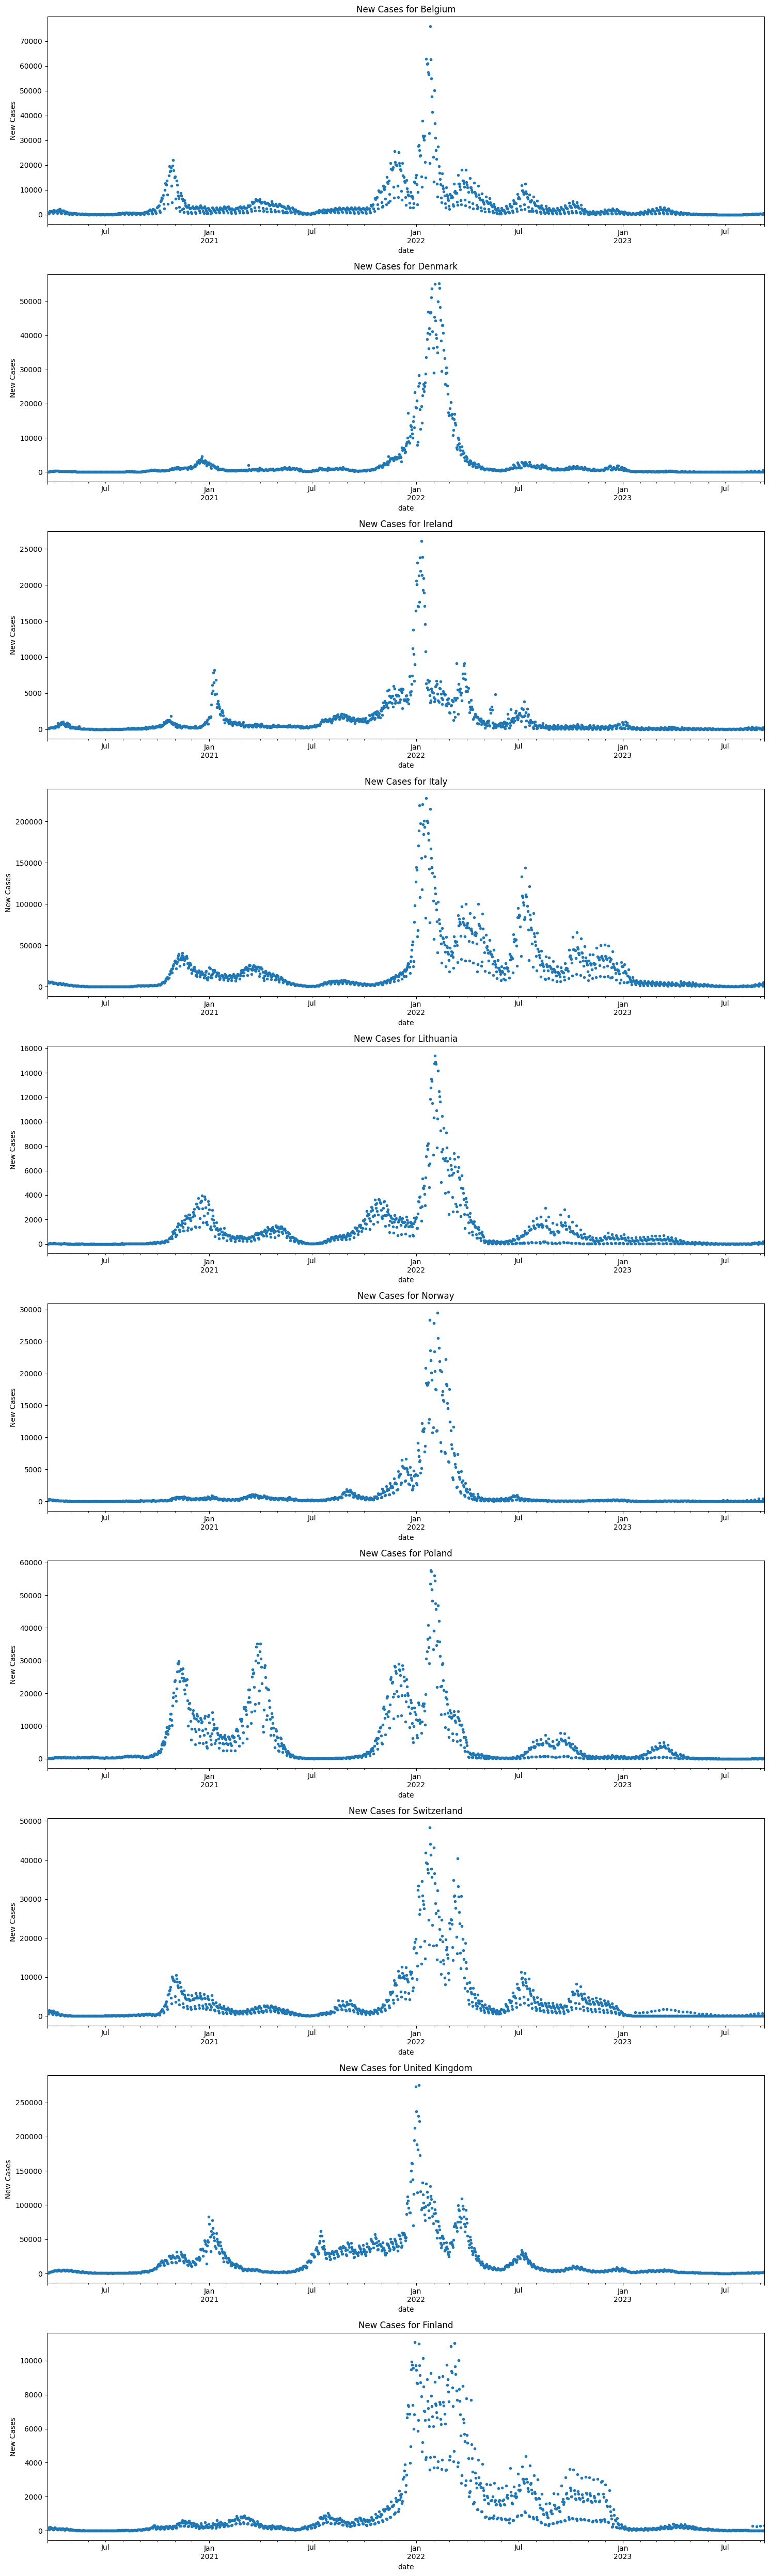

In [66]:
selected_data_visual = selected_data.copy()
selected_data_visual.set_index('date', inplace=True)
selected_data_visual.sort_index(inplace=True)
locations = selected_data_visual['location'].unique()

plt.figure(figsize=(15, 5 * len(locations)))

for i, location in enumerate(locations, 1):
    plt.subplot(len(locations), 1, i)
    selected_data_visual[selected_data_visual['location'] == location]['new_cases'].plot(style='.', title=f'New Cases for {location}')
    plt.ylabel('New Cases')

plt.tight_layout()
plt.show()

In [60]:
# figure out when does each country start reporting data
non_zero_cases = selected_data[selected_data['new_cases'] > 0]
first_non_zero_case_date = non_zero_cases.groupby('location')['date'].min()
first_non_zero_case_date

location
Belgium           2020-02-05
Denmark           2020-02-28
Finland           2020-01-04
Ireland           2020-03-02
Italy             2020-01-31
Lithuania         2020-03-21
Norway            2020-02-22
Poland            2020-03-05
Switzerland       2020-02-25
United Kingdom    2020-02-01
Name: date, dtype: object

In [62]:
selected_data['date'] = pd.to_datetime(selected_data['date'])
selected_data = selected_data[selected_data['date'] >= pd.Timestamp('2020-03-21')]
non_zero_cases = selected_data[selected_data['new_cases'] > 0]
first_non_zero_case_date = non_zero_cases.groupby('location')['date'].min()
first_non_zero_case_date

/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_48675/3993552312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['date'] = pd.to_datetime(selected_data['date'])


location
Belgium          2020-03-21
Denmark          2020-03-21
Finland          2020-03-21
Ireland          2020-03-21
Italy            2020-03-21
Lithuania        2020-03-21
Norway           2020-03-21
Poland           2020-03-21
Switzerland      2020-03-21
United Kingdom   2020-03-21
Name: date, dtype: datetime64[ns]

In [54]:
last_non_zero_case_date = non_zero_cases.groupby('location')['date'].max()
last_non_zero_case_date

location
Belgium           2023-09-14
Denmark           2023-09-12
Finland           2023-09-08
Ireland           2023-09-12
Italy             2023-09-14
Lithuania         2023-09-12
Norway            2023-09-12
Poland            2023-09-12
Switzerland       2023-09-11
United Kingdom    2023-09-14
Name: date, dtype: object

In [68]:
selected_data = selected_data[selected_data['date'] <= pd.Timestamp('2023-01-01')]
non_zero_cases = selected_data[selected_data['new_cases'] > 0]
last_non_zero_case_date = non_zero_cases.groupby('location')['date'].max()
last_non_zero_case_date

location
Belgium          2023-01-01
Denmark          2023-01-01
Finland          2023-01-01
Ireland          2023-01-01
Italy            2023-01-01
Lithuania        2023-01-01
Norway           2023-01-01
Poland           2023-01-01
Switzerland      2023-01-01
United Kingdom   2023-01-01
Name: date, dtype: datetime64[ns]

In [72]:
# check for 0s
zero_cases = selected_data[selected_data['new_cases'] < 0]
zero_cases.groupby('location')['new_cases'].count()

Series([], Name: new_cases, dtype: int64)

### Missingness in regressors

In [55]:
# check for missingness by country
missing_values_by_location = selected_data.groupby('location').apply(lambda x: x.isnull().sum())
missing_values_df = pd.DataFrame(missing_values_by_location)
missing_values_df.to_csv('missing_values.csv')

In [57]:
#data missingness
missing_data = selected_data.isnull().sum()
threshold = 0.4 * len(selected_data)
missing_data = missing_data[missing_data < threshold]
missing_data

iso_code                                         0
continent                                        0
location                                         0
total_cases                                    474
new_cases                                       13
new_cases_smoothed                              63
total_deaths                                   625
new_deaths                                       6
new_deaths_smoothed                             56
total_cases_per_million                        474
new_cases_per_million                           13
new_cases_smoothed_per_million                  63
total_deaths_per_million                       625
new_deaths_per_million                           6
new_deaths_smoothed_per_million                 56
reproduction_rate                             3277
hosp_patients                                 4609
hosp_patients_per_million                     4609
new_tests_smoothed                            5404
new_tests_smoothed_per_thousand

In [15]:
# # drop features with >30% missingness
# threshold = 0.7 * len(selected_data)
# data_clean = selected_data.dropna(thresh=threshold, axis=1)
# data_clean.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_vaccinations_smoothed',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'hospital_beds_per_thousand', '

### Multi-Collinearity

## Time Series Decomposition

<Figure size 1000x600 with 0 Axes>

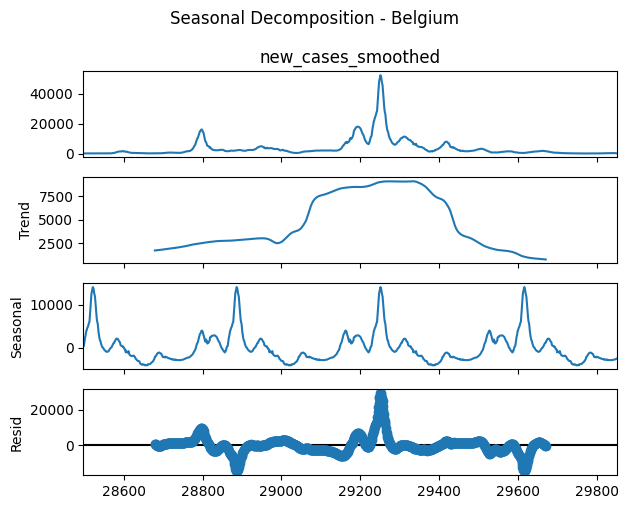

<Figure size 1000x600 with 0 Axes>

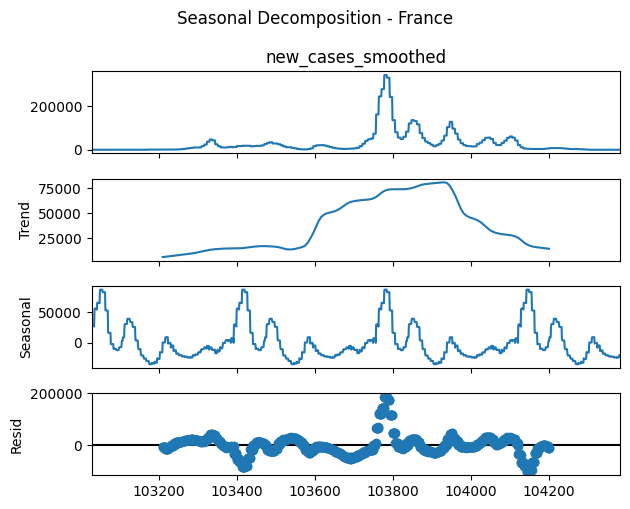

<Figure size 1000x600 with 0 Axes>

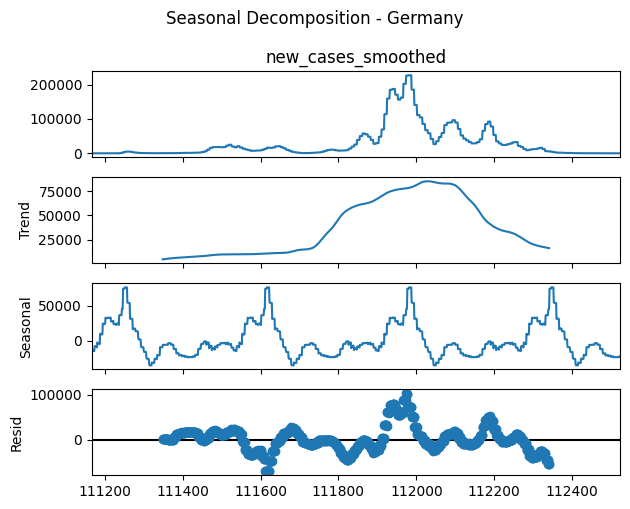

<Figure size 1000x600 with 0 Axes>

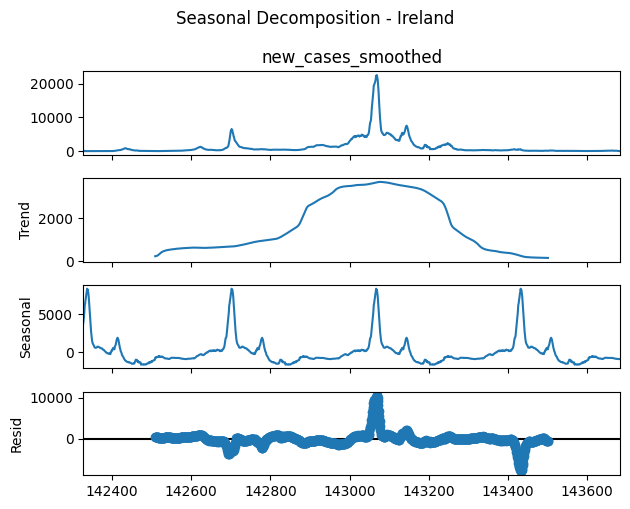

<Figure size 1000x600 with 0 Axes>

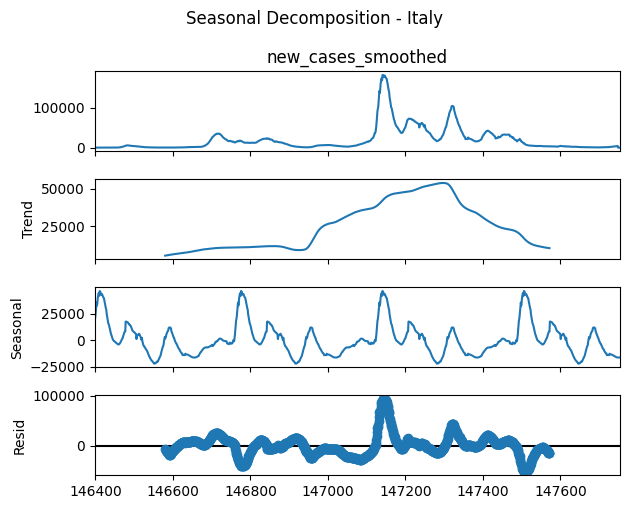

<Figure size 1000x600 with 0 Axes>

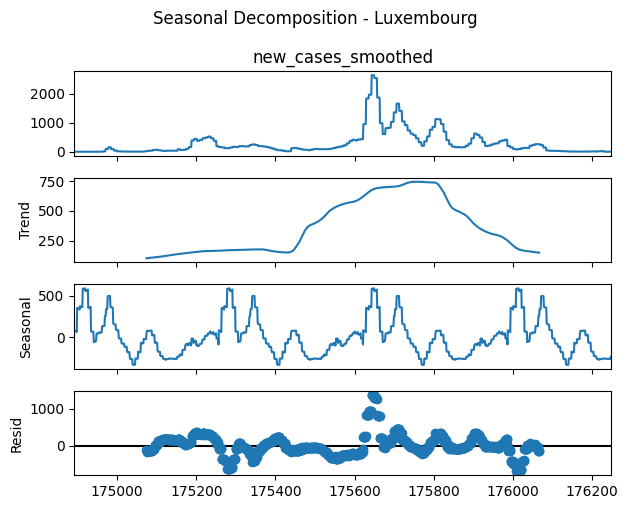

<Figure size 1000x600 with 0 Axes>

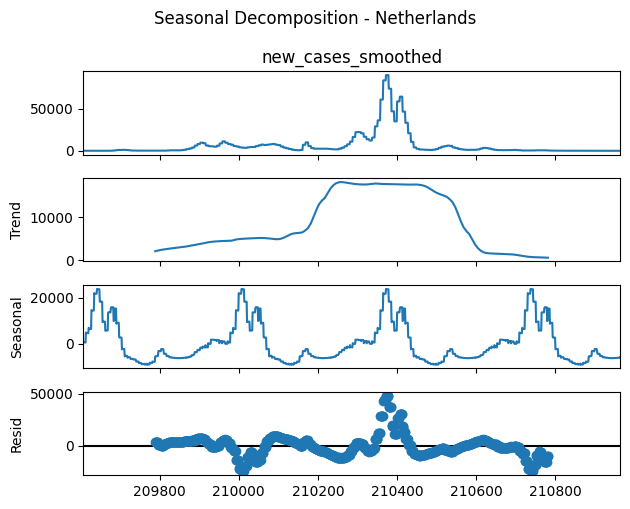

<Figure size 1000x600 with 0 Axes>

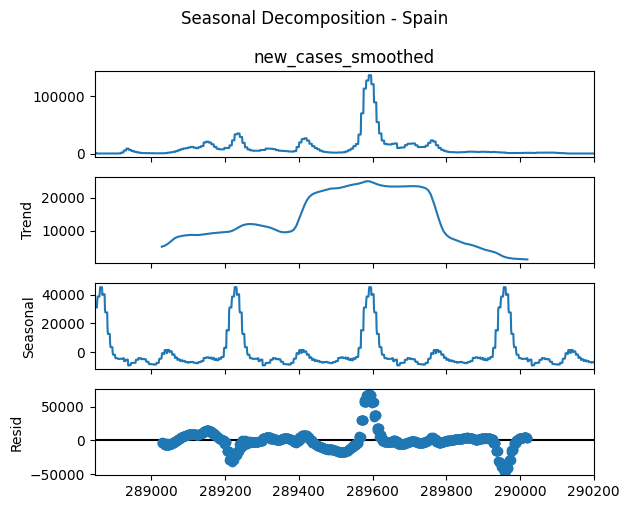

<Figure size 1000x600 with 0 Axes>

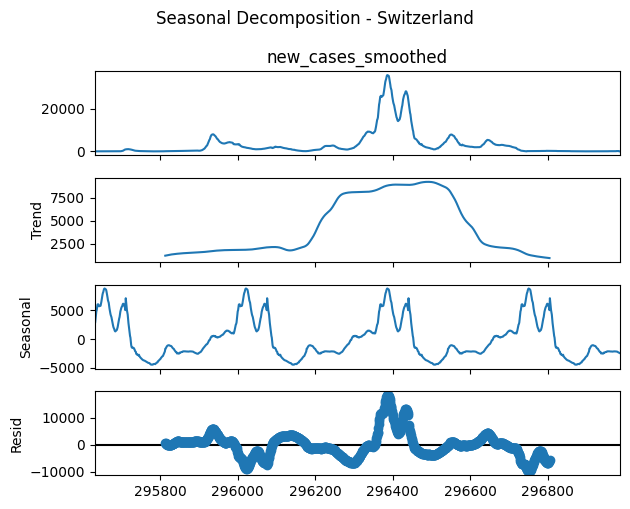

<Figure size 1000x600 with 0 Axes>

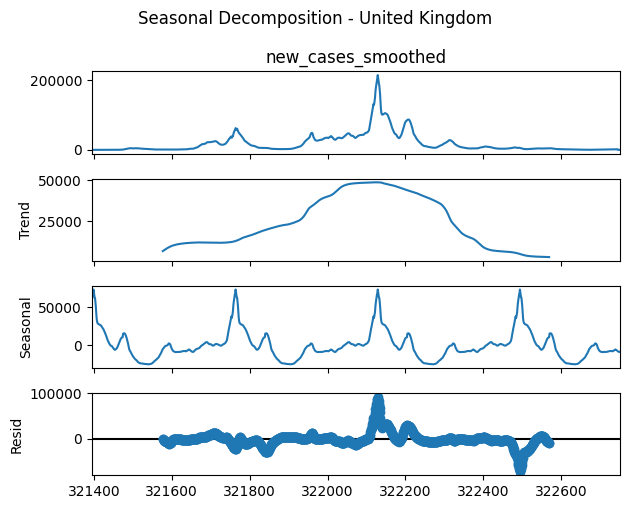

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


for country in data_clean_imputed['location'].unique():
    country_data = data_clean_imputed[data_clean_imputed['location'] == country]
    result = seasonal_decompose(country_data['new_cases_smoothed'], period=365)
    
    plt.figure(figsize=(10, 6))
    
    # Create plots
    result.plot()
    
    # Set the title with a higher y value to shift it up
    plt.suptitle(f'Seasonal Decomposition - {country}', y=1.05)
    
    # Save the figure with a lowercase country name
    plt.savefig('acf_plot_' + country.lower() + '.png')
    
    # Display the figure
    plt.show()



In [22]:
plt.savefig('autocorrelation_plot.png')

<Figure size 640x480 with 0 Axes>

## Time Series Data Stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

for country in data_clean_imputed['location'].unique():
    country_data = data_clean_imputed[data_clean_imputed['location'] == country]
    result = adfuller(country_data['new_cases_smoothed'].values)
    
    print(f'Results for {country}:')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('---------------------------------------------')


Results for Belgium:
ADF Statistic: -3.185635
p-value: 0.020831
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for Ireland:
ADF Statistic: -3.228222
p-value: 0.018408
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for Italy:
ADF Statistic: -3.244839
p-value: 0.017532
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for Luxembourg:
ADF Statistic: -3.176654
p-value: 0.021376
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for France:
ADF Statistic: -3.929443
p-value: 0.001829
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for Netherlands:
ADF Statistic: -2.848083
p-value: 0.051727
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for 

## Feature Creation

### Auto Correlation

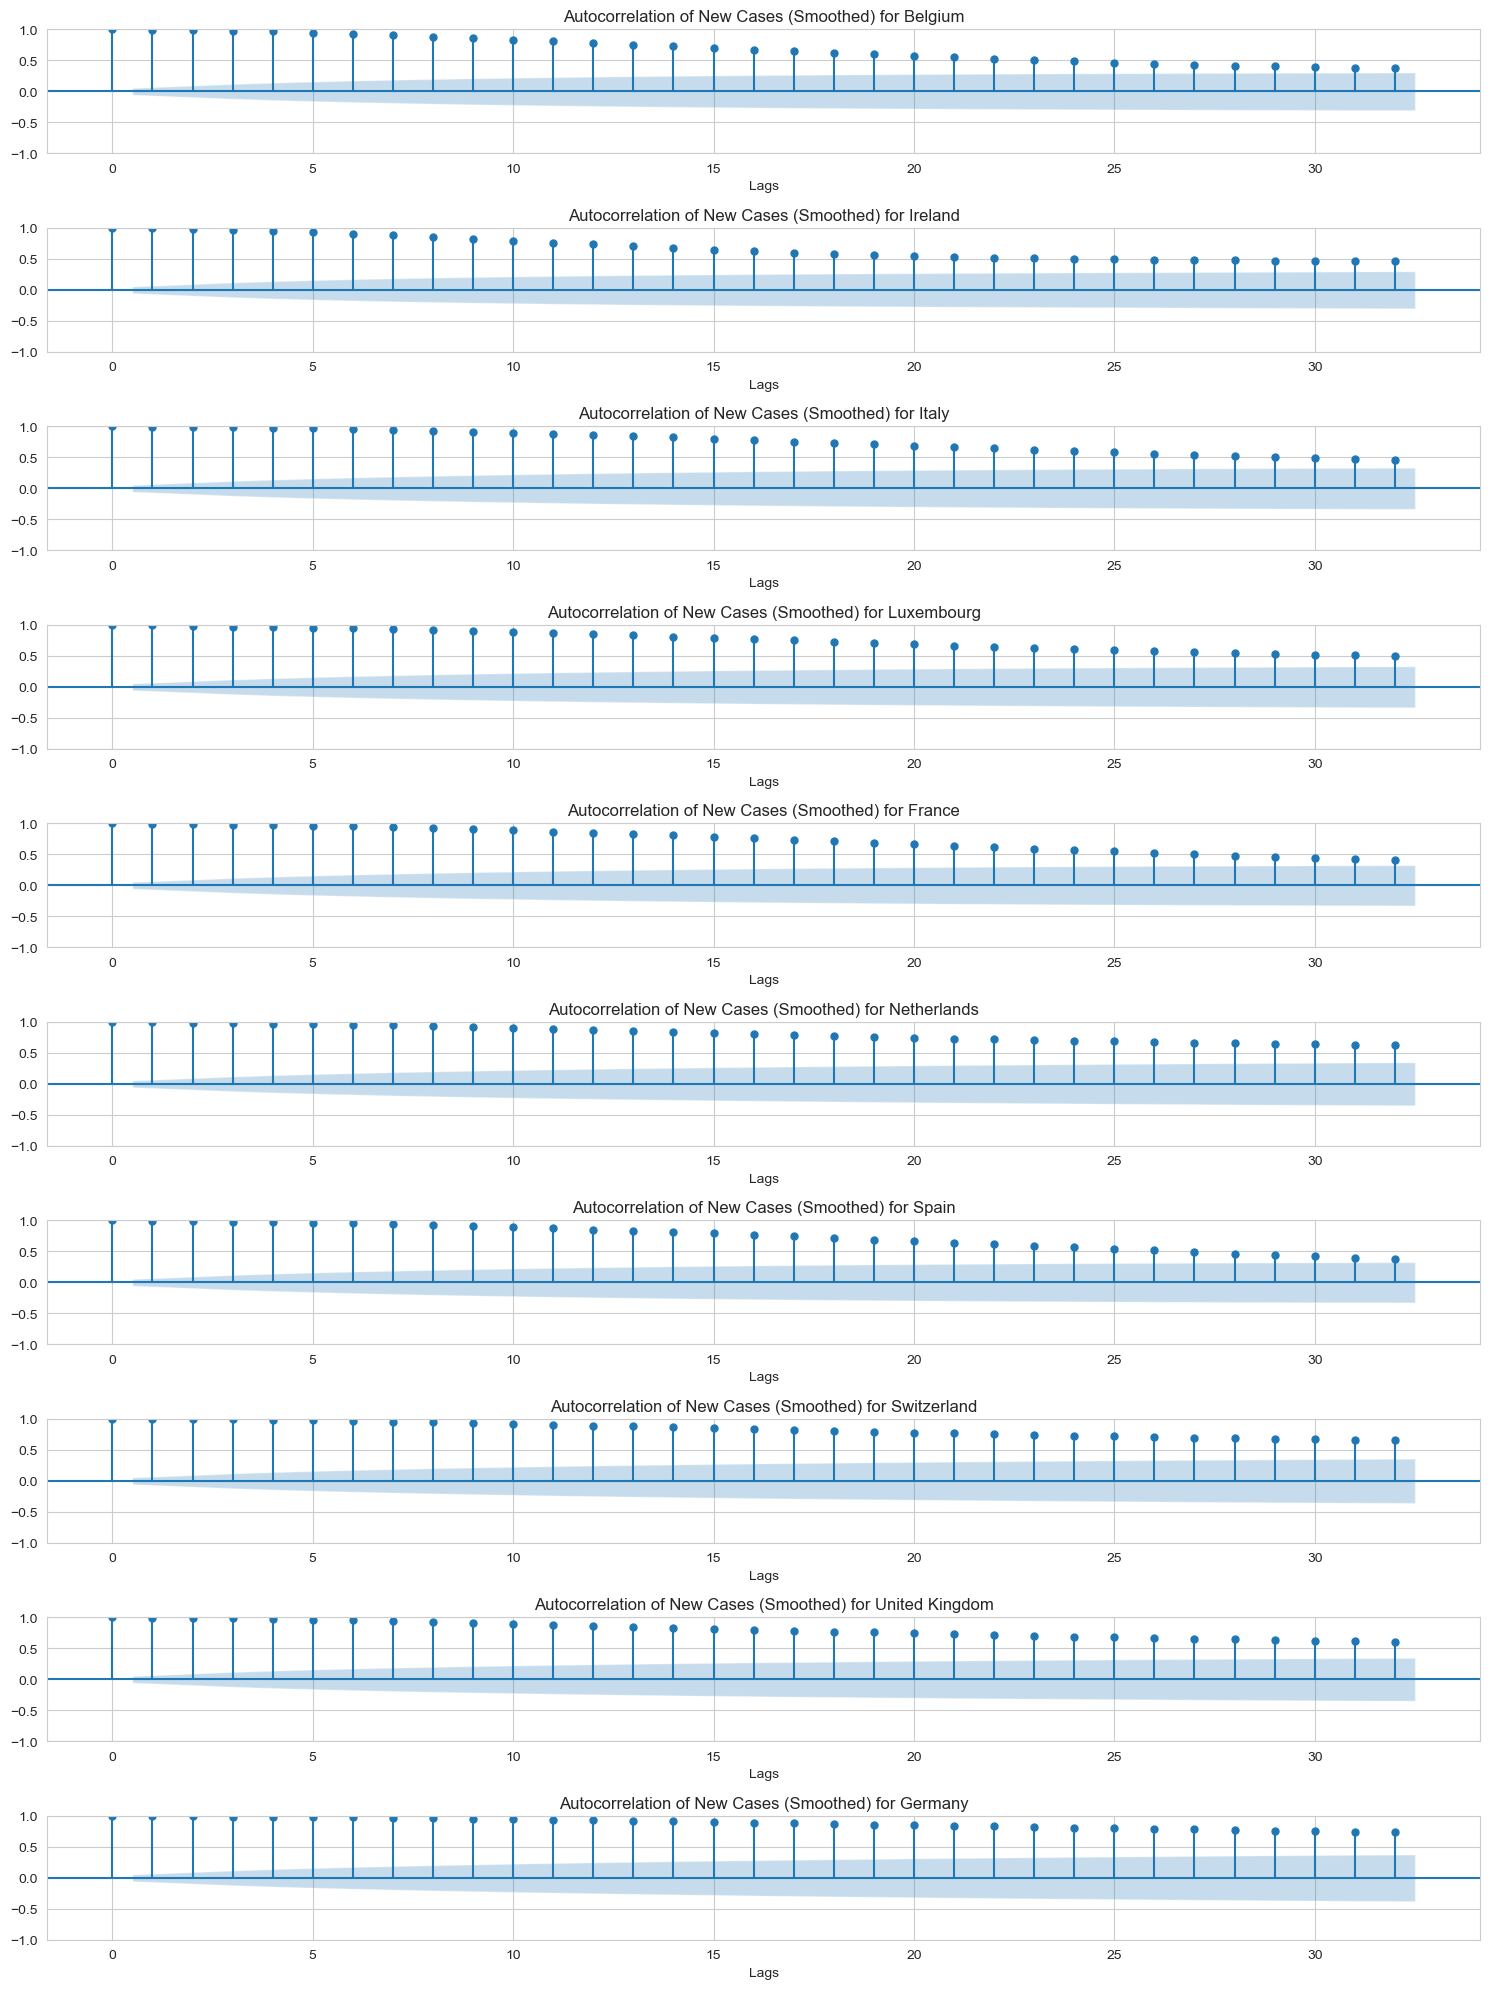

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

countries = data_clean_imputed['location'].unique()

plt.figure(figsize=(15, 20))

for i, country in enumerate(countries, 1):
    plt.subplot(len(countries), 1, i)
    country_data = data_clean_imputed[data_clean_imputed['location'] == country]['new_cases_smoothed']
    plot_acf(country_data.dropna(), alpha=0.05, ax=plt.gca())
    plt.title(f'Autocorrelation of New Cases (Smoothed) for {country}')
    plt.xlabel('Lags')

plt.tight_layout()
plt.show()

### Rolling and Lag Features

In [ ]:
# lagged features with new_cases
for lag in [1, 7, 14]:
    data_clean_imputed[f'new_cases_lag{lag}'] = data_clean_imputed['new_cases_smoothed'].shift(lag)

In [ ]:
# rolling window 7-day and 14-day for new_cases
for window in [7, 14]:
    data_clean_imputed[f'new_cases_roll_mean{window}'] = data_clean_imputed['new_cases_smoothed'].rolling(window=window).mean()
    data_clean_imputed[f'new_cases_roll_std{window}'] = data_clean_imputed['new_cases_smoothed'].rolling(window=window).std()

In [ ]:
data_clean_imputed.head(10)

,iso_code,continent,location,new_cases_smoothed,new_deaths_smoothed,reproduction_rate,icu_patients,weekly_hosp_admissions,new_vaccinations_smoothed,stringency_index,population_density,gdp_per_capita,extreme_poverty,new_cases_lag1,new_cases_lag7,new_cases_lag14,new_cases_roll_mean7,new_cases_roll_std7,new_cases_roll_mean14,new_cases_roll_std14
date,,,,,,,,,,,,,,,,,,,,
2020-01-03,BEL,Europe,Belgium,0.0000,-1.421085e-14,0.988,7.8,116.2,84.6,0.0,375.564,42658.576,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,IRL,Europe,Ireland,0.0000,-1.421085e-14,0.828,5.0,242.6,24.0,0.0,69.874,67335.293,0.2,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,ITA,Europe,Italy,0.0000,-1.421085e-14,1.118,25.8,268.2,44.2,0.0,205.859,35220.084,2.0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,LUX,Europe,Luxembourg,3.0858,-1.421085e-14,1.110,0.8,8.0,48.6,0.0,231.447,94277.965,0.2,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,FRA,Europe,France,11870.8288,1.982840e+01,0.978,868.4,3311.6,2027.4,0.0,122.578,38605.671,1.0,3.0858,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NLD,Europe,Netherlands,6.5144,-1.421085e-14,1.564,4.4,112.4,42.6,0.0,508.544,48472.545,0.2,11870.8288,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,ESP,Europe,Spain,783.5144,1.322840e+01,1.188,114.8,1440.6,3418.0,0.0,93.105,34272.360,1.0,6.5144,NaN,NaN,1809.134771,4446.341995,NaN,NaN
2020-01-03,CHE,Europe,Switzerland,166.6854,8.570000e-01,0.634,15.6,239.8,191.8,0.0,214.243,57410.166,0.2,783.5144,0.0,NaN,1832.946971,4435.471508,NaN,NaN
2020-01-03,GBR,Europe,United Kingdom,0.0000,-1.421085e-14,0.820,187.8,4201.4,12670.6,0.0,272.898,39753.244,0.2,166.6854,0.0,NaN,1832.946971,4435.471508,NaN,NaN


### Additional Features 

In [ ]:
# Data time features
data_clean_imputed['day_of_week'] = data_clean_imputed.index.dayofweek
# 0 refers to Monday and 6 to Sunday, we want to tell if the date is weekend or not
data_clean_imputed['weekend'] = np.where(data_clean_imputed['day_of_week'].isin([5, 6]), 1, 0)
data_clean_imputed['month'] = data_clean_imputed.index.month
data_clean_imputed['year'] = data_clean_imputed.index.year
data_clean_imputed.head(2)

,iso_code,continent,location,new_cases_smoothed,new_deaths_smoothed,reproduction_rate,icu_patients,weekly_hosp_admissions,new_vaccinations_smoothed,stringency_index,...,new_cases_lag7,new_cases_lag14,new_cases_roll_mean7,new_cases_roll_std7,new_cases_roll_mean14,new_cases_roll_std14,day_of_week,weekend,month,year
date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,BEL,Europe,Belgium,0.0,-1.421085e-14,0.988,7.8,116.2,84.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,1,2020
2020-01-03,IRL,Europe,Ireland,0.0,-1.421085e-14,0.828,5.0,242.6,24.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,1,2020


In [ ]:
data_clean_imputed['date'] = data_clean_imputed.index
data_clean_imputed['season'] = data_clean_imputed['date'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or 
                                      x.month == 2 else 'Spring' if  x.month == 3 or 
                                      x.month == 4 or x.month == 5 else 'Summer' if  
                                      x.month == 6 or x.month == 7 or 
                                      x.month == 8 else 'Autumn' if  
                                      x.month == 9 or x.month == 10 or x.month == 11 else '')

In [ ]:
pip install holidays


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import holidays
import datetime
data_clean_imputed['holidays'] = data_clean_imputed['date'].apply( lambda x: 'Holiday' if x in holidays.US() 
                                      else 'Holiday' if x + datetime.timedelta(days=1) in holidays.US() else 'Normal day' )

In [ ]:
adjacent_countries = {
    'Spain': ['France'],
    'France': ['Spain', 'Belgium', 'Germany', 'Italy', 'Switzerland', 'Luxembourg'],
    'Germany': ['France', 'Belgium', 'Netherlands', 'Switzerland', 'Luxembourg'],
    'Ireland': ['United Kingdom'],
    'United Kingdom': ['Ireland'],
    'Italy': ['France', 'Switzerland'],
    'Belgium': ['France', 'Germany', 'Netherlands', 'Luxembourg'],
    'Netherlands': ['Germany', 'Belgium'],
    'Switzerland': ['France', 'Germany', 'Italy'],
    'Luxembourg': ['France', 'Germany', 'Belgium']
}

data_clean_imputed['adjacent_new_cases'] = 0

for country in adjacent_countries:
    if country in data_clean_imputed['location'].unique():
        adjacent_data = data_clean_imputed[data_clean_imputed['location'].isin(adjacent_countries[country])]
        daily_sum = adjacent_data.groupby('date')['new_cases'].sum()
        country_data = data_clean_imputed[data_clean_imputed['location'] == country]
        country_data = pd.merge(country_data, daily_sum, how='left', left_index=True, right_index=True, suffixes=('', '_adjacent'))
        if country in adjacent_countries[country]:
            country_data['new_cases_adjacent'] -= country_data['new_cases']
        
data_clean_imputed.loc[data_clean_imputed['location'] == country, 'adjacent_new_cases'] = country_data['new_cases_adjacent'].fillna(0)

data_clean_imputed[['location', 'new_cases', 'adjacent_new_cases']]


ValueError: 'date' is both an index level and a column label, which is ambiguous.

## Test Train Split

In [ ]:
# test train split
train_size = 0.8  
split_idx = int(len(data_clean_imputed) * train_size)
train = data_clean_imputed.iloc[:split_idx]
test = data_clean_imputed.iloc[split_idx:]

print('Train set shape:', train.shape)
print('Test set shape:', test.shape)


Train set shape: (10856, 27)
Test set shape: (2714, 27)


## EDA

### Univariate Analysis

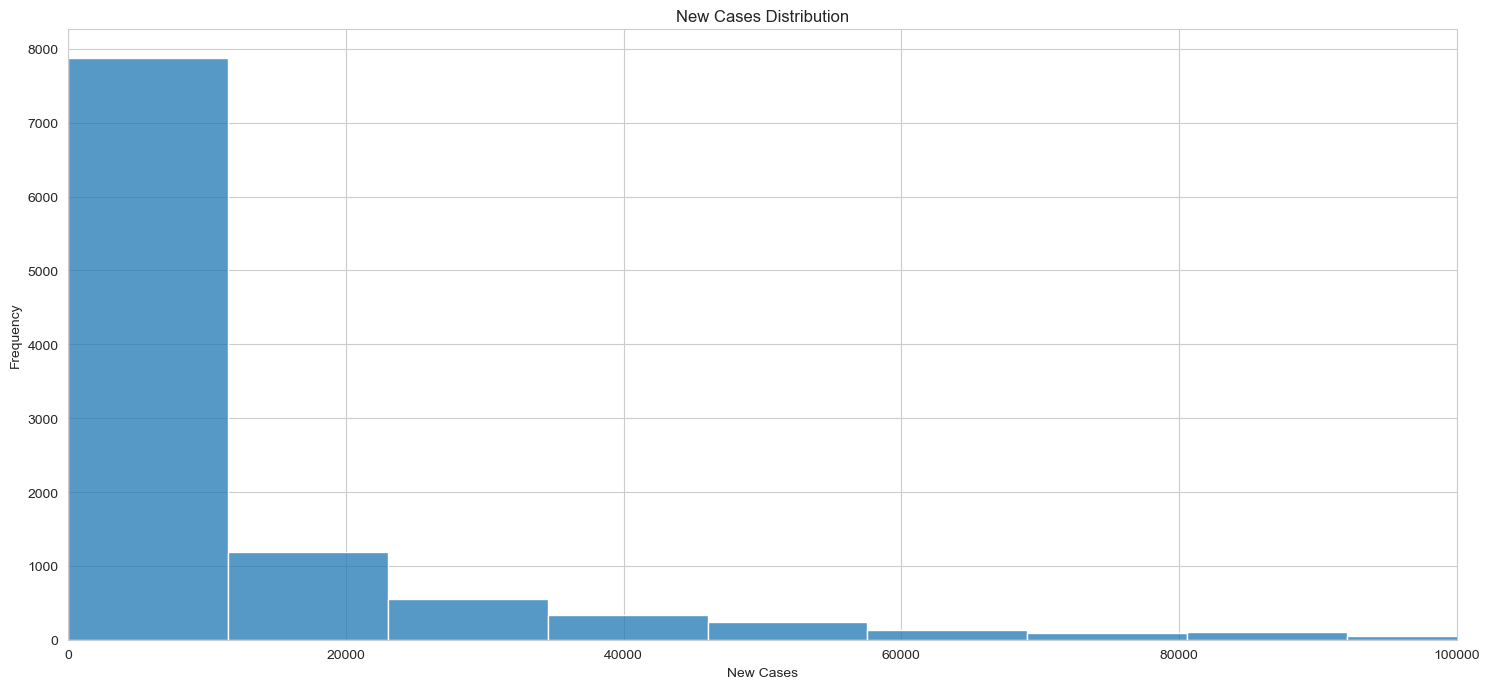

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))

sns.histplot(train['new_cases_smoothed'], kde=False, bins=30)
plt.title('New Cases Distribution')
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.xlim(0, 100000)

plt.tight_layout()
plt.show()


### Bivariate Analysis

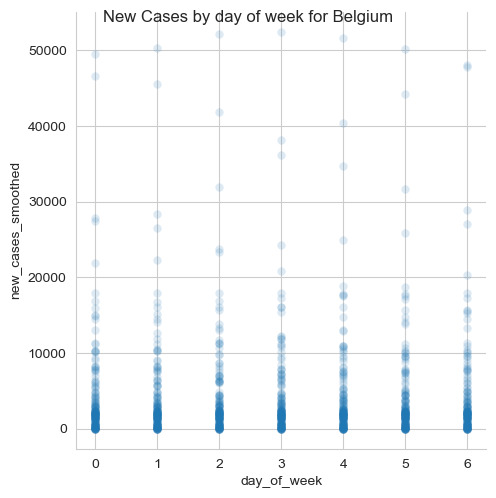

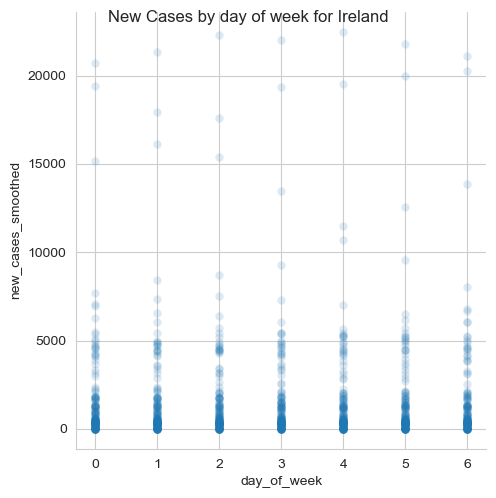

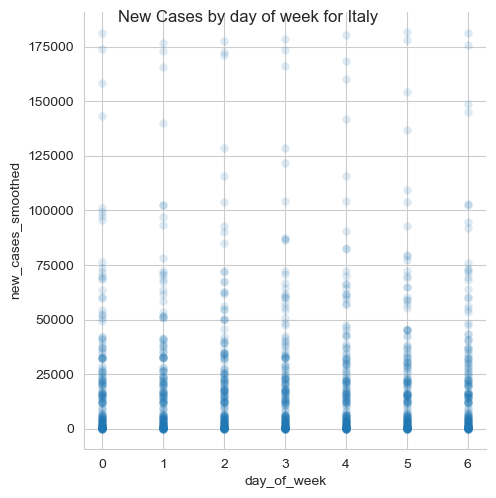

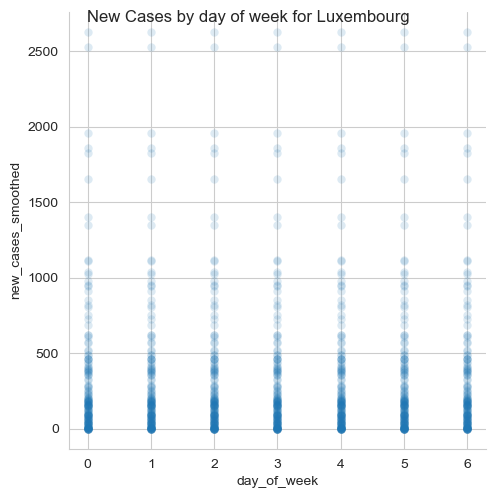

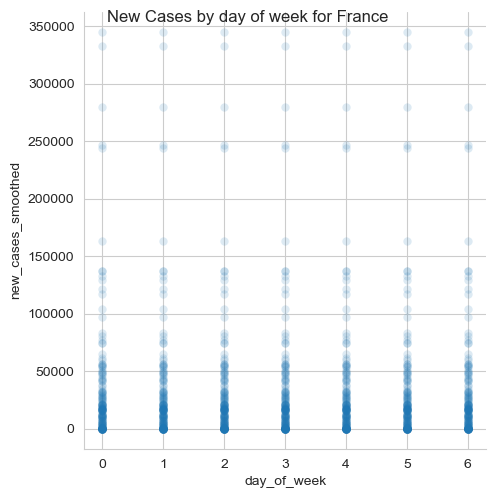

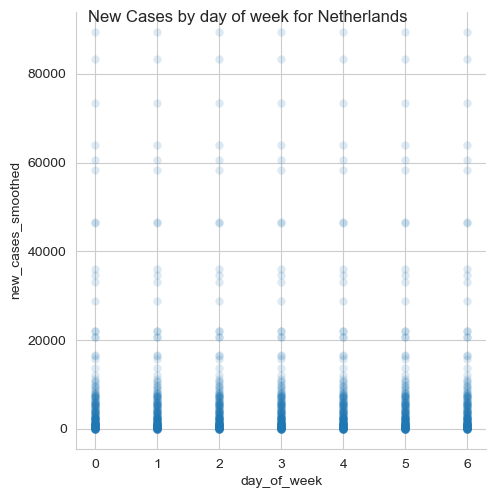

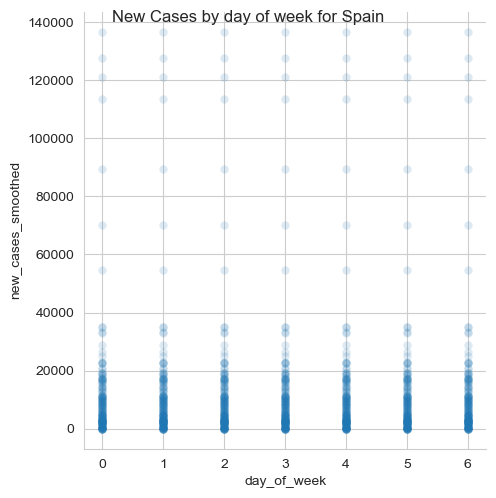

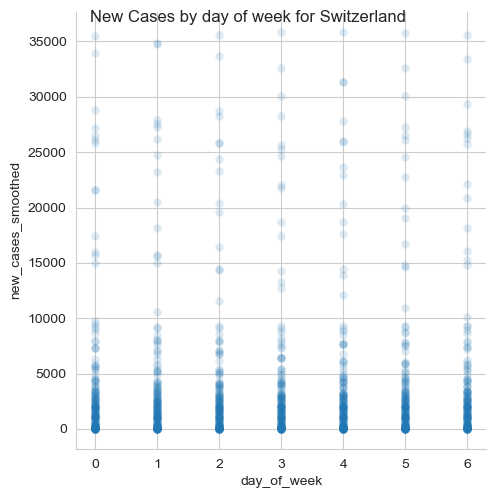

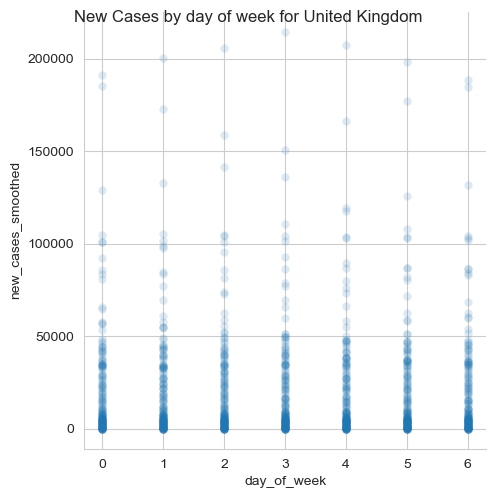

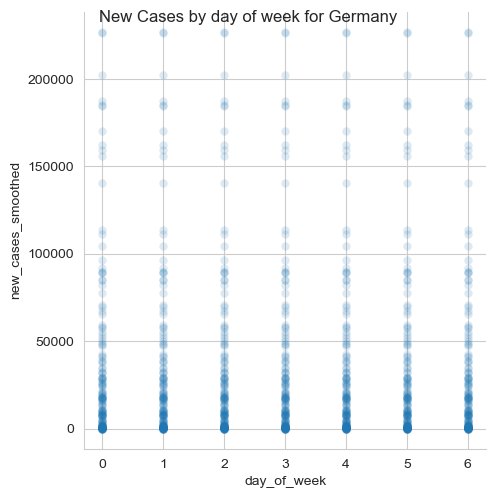

In [ ]:
for country in countries:
    country_data = train[train['location'] == country]

    sns.pairplot(country_data,
                 x_vars=['day_of_week'],
                 y_vars='new_cases_smoothed',
                 height=5,
                 plot_kws={'alpha': 0.15, 'linewidth': 0})
    
    plt.suptitle(f'New Cases by day of week for {country}')
    plt.show()


### Multivariate Analysis

/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_3314/2861495228.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr( method='pearson' )


<Axes: >

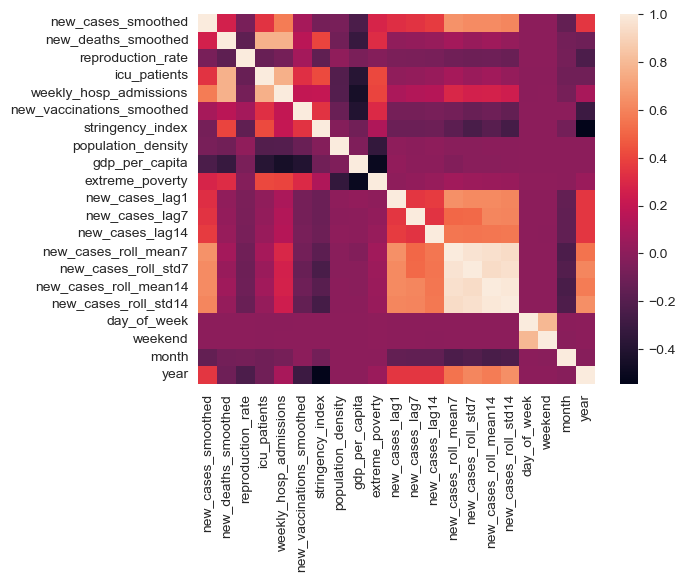

In [ ]:
correlation = train.corr( method='pearson' )
sns.heatmap( correlation )